<div class="alert alert-block alert-info" align=left><b></b>
Human Activity Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.chdir("C:/Users/Nirmal Raj/Downloads/Class_sudeshna Sarkar/Intern insofe/UCI HAR Dataset/UCI HAR Dataset/Files")

In [3]:
os.getcwd()

'C:\\Users\\Nirmal Raj\\Downloads\\Class_sudeshna Sarkar\\Intern insofe\\UCI HAR Dataset\\UCI HAR Dataset\\Files'

In [4]:
data = pd.read_csv('X_train.txt',sep = "\t",header = None)
data1 = pd.read_csv('y_train.txt',sep = "\t",header = None)
data2 = pd.read_csv('X_test.txt',sep = "\t",header = None)
data3 = pd.read_csv('y_test.txt',sep = "\t",header = None)
#subject_train  = pd.read_csv('subject_train.txt',header = None)
#subject_test = pd.read_csv('subject_test.txt',header = None)

In [5]:
X_tra = [[float(number) for number in data[0].iloc[line].split()] for line in range(len(data))]
X_te = [[float(number) for number in data2[0].iloc[line].split()] for line in range(len(data2))]
X_tr = pd.DataFrame(X_tra)
X_ts = pd.DataFrame(X_te)

In [6]:
features = pd.read_csv('features.txt',sep = "\t",header = None)
features['col_name'] = str(0)
for i in range(len(features)):
    words = features[0].iloc[i].split()
    features['col_name'].iloc[i] = words[1]

In [7]:
Features = features.drop([0], axis=1)

In [8]:
X_tr.columns = X_tr.columns[:0].tolist() + Features['col_name'].values.tolist()
X_ts.columns = X_ts.columns[:0].tolist() + Features['col_name'].values.tolist()
X_train = X_tr
X_test = X_ts
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)

X_train :  (7352, 561)
X_test :  (2947, 561)


In [9]:
y_train = data1.rename(columns = {0:"Activity"})
y_test = data3.rename(columns = {0:"Activity"})
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

y_train :  (7352, 1)
y_test :  (2947, 1)


In [10]:
# sub_train = subject_train.rename(columns = {0:'Subject'})
# sub_test = subject_test.rename(columns = {0:'Subject'})
# X_train['Subject'] = sub_train
# X_test['Subject'] = sub_test
print("X_train : ",X_train.shape)
print("X_test : ",X_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

X_train :  (7352, 561)
X_test :  (2947, 561)
y_train :  (7352, 1)
y_test :  (2947, 1)


In [11]:
y_train.Activity.replace([1,2,3,4,5,6],['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],inplace=True)
y_test.Activity.replace([1,2,3,4,5,6],['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING'],inplace=True)

In [12]:
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [13]:
print('Train Shape : ',train.shape)
print('Test Shape : ',test.shape)

Train Shape :  (7352, 562)
Test Shape :  (2947, 562)


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 31.5+ MB


In [15]:
train['Activity'].describe()

count       7352
unique         6
top       LAYING
freq        1407
Name: Activity, dtype: object

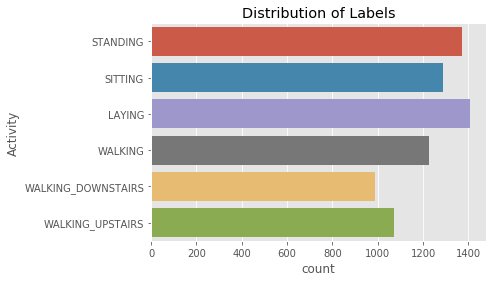

In [16]:
ax = sns.countplot(y = train['Activity'])
ax.set_title('Distribution of Labels')
plt.show()

In [17]:
train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING


In [18]:
X_train=train.iloc[:,0:561].values
y_train=train.iloc[:, 561].values
print('X_train : ',X_train.shape)
print('y_train : ',y_train.shape)

X_train :  (7352, 561)
y_train :  (7352,)


In [19]:
X_test=test.iloc[:,0:561].values
y_test=test.iloc[:, 561].values
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

X_test :  (2947, 561)
y_test :  (2947,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 70)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [22]:
principle_components = pd.DataFrame(X_train)

In [23]:
principle_components.tail(3)

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
7349,14.333436,-12.260712,4.025947,3.849781,-2.860488,-3.624039,-3.929693,-0.873186,-0.746497,-1.575822,...,0.115059,-2.075007,1.363540,-0.311594,0.055239,0.379975,-0.490469,0.512310,-0.068088,-1.085870
7350,12.876019,-14.071256,2.916060,5.013422,-3.938217,-2.137600,-5.390397,0.321265,-0.916338,-1.646384,...,-0.283016,-1.222087,1.304564,-0.006161,-0.906528,0.205259,-0.585949,0.541683,-0.809112,-1.441248
7351,13.016104,-12.244261,1.336046,4.215301,-1.834854,-2.354378,-5.004044,2.631360,0.805703,0.031773,...,-1.920278,0.272332,0.465273,0.511577,-0.655505,-0.985105,0.620875,-0.526142,-0.798133,-0.799016


In [24]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.0099586  0.00965087 0.00860052 0.00800281
 0.00763996 0.00645329 0.00632324 0.00599721 0.00586749 0.00575407
 0.0056792  0.00527295 0.00500361 0.00488406 0.00478201 0.00468561
 0.00449288 0.00421016 0.00417966 0.00405562 0.00388513 0.00387003
 0.0036594  0.00354525 0.00347901 0.00337157 0.00329625 0.00328155
 0.00320492 0.00295532 0.00286627 0.00284894 0.00268626 0.0026532
 0.00263207 0.00258433 0.00248845 0.00246641 0.00240226 0.00235822
 0.0022956  0.00226947 0.00219873 0.00212863 0.00207037 0.00201136
 0.00197781 0.00196746 0.00193109 0.00188211 0.0018636  0.00184326
 0.00179937 0.00174922 0.00172752 0.00167479 0.00167193 0.00164871
 0.00160191 0.00158215 0.00154354 0.00153108]


In [25]:
ratio = pca.explained_variance_ratio_

In [26]:
ratio.sum()

0.9115445645294373

<Figure size 432x288 with 0 Axes>

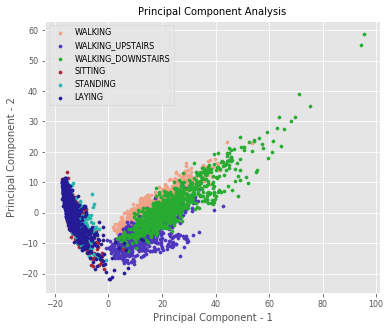

In [27]:
plt.figure()
plt.figure(figsize=(6,5))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Principal Component - 1',fontsize=10)
plt.ylabel('Principal Component - 2',fontsize=10)
plt.title("Principal Component Analysis",fontsize=10)
targets = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
colors = ['#f0a289','#4e35bd','#27ab30','#a82539','#26b5ae','#251b96']
for target, color in zip(targets,colors):
    indicesToKeep = train['Activity'] == target
    plt.scatter(principle_components.loc[indicesToKeep, 0]
               ,principle_components.loc[indicesToKeep, 1], c = color, s = 10)

plt.legend(targets,prop={'size': 8})

In [28]:
X_train_pca = pd.DataFrame(X_train)
X_test_pca = pd.DataFrame(X_test)

In [29]:
X_train_pca.shape,X_test_pca.shape

((7352, 70), (2947, 70))

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

rf = RandomForestClassifier()

param_grid_rf = {"n_estimators": [30,50,60],
                 "max_depth": [2,3,5,7],
                 "min_samples_leaf": [2, 4]}

classifiers = [['Random_Forest_Tuned : ',GridSearchCV(rf,param_grid=param_grid_rf,cv=5,scoring='accuracy')],
               ['Xg_boost : ',XGBClassifier()],
               ['Bagging Classifier : ',BaggingClassifier()]]


# class_predictions = []
for name,model in classifiers:
    model=model
    start_time = datetime.now()
    model.fit(X_train,y_train)
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
#   class_predictions.append(accuracy_score(y_test,predictions))
    print(f'{name}_Train_Accuracy :',accuracy_score(y_train,predictions))
    print(f'{name}_Test_Accuracy :',accuracy_score(y_test,predictions1))
    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))
    print('--------------------------------------------------')

Random_Forest_Tuned : _Train_Accuracy : 0.9182535364526659
Random_Forest_Tuned : _Test_Accuracy : 0.833050559891415
Duration: 0:03:37.507408
--------------------------------------------------
Xg_boost : _Train_Accuracy : 0.971436343852013
Xg_boost : _Test_Accuracy : 0.8836104513064132
Duration: 0:01:01.973543
--------------------------------------------------
Bagging Classifier : _Train_Accuracy : 0.9957834602829162
Bagging Classifier : _Test_Accuracy : 0.8218527315914489
Duration: 0:00:08.362479
--------------------------------------------------


## Deep Neural Network Techniques with PCA

In [31]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [32]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras import optimizers
from keras.optimizers import SGD
import tensorflow as tf
model = Sequential()
model.add(Dense(45,activation='relu',input_dim=70))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 45)                3195      
_________________________________________________________________
dropout_1 (Dropout)          (None, 45)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1150      
_________________________________________________________________
dropout_2 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 156       
Total params: 4,501
Trainable params: 4,501
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_history = model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 7352 samples, validate on 2947 samples
Epoch 1/50
7352/7352 [==============================] - 1s 131us/step - loss: 1.7109 - acc: 0.4172 - val_loss: 0.7935 - val_acc: 0.6987
Epoch 2/50
7352/7352 [==============================] - 0s 64us/step - loss: 0.8820 - acc: 0.5996 - val_loss: 0.5761 - val_acc: 0.7520
Epoch 3/50
7352/7352 [==============================] - 0s 45us/step - loss: 0.7364 - acc: 0.6561 - val_loss: 0.4837 - val_acc: 0.8107
Epoch 4/50
7352/7352 [==============================] - 0s 41us/step - loss: 0.6560 - acc: 0.7020 - val_loss: 0.3980 - val_acc: 0.8100
Epoch 5/50
7352/7352 [==============================] - 0s 60us/step - loss: 0.5989 - acc: 0.7267 - val_loss: 0.3879 - val_acc: 0.8059
Epoch 6/50
7352/7352 [==============================] - 0s 27us/step - loss: 0.5407 - acc: 0.7548 - val_loss: 0.3271 - val_acc: 0.8758
Epoch 7/50
7352/7352 [==============================] - 0s 27us/step - loss: 0.5161 - acc: 0.

In [36]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


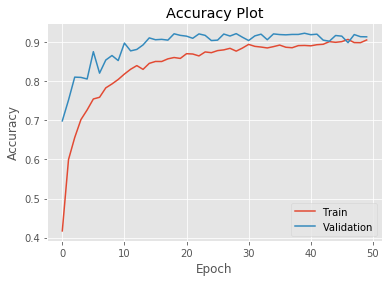

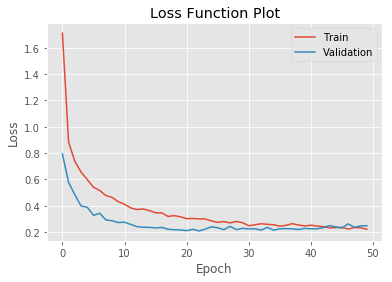

In [37]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show() 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Finding Best Parameters

In [38]:
def model_def(h_activation, o_activation, kernel_init):
    model=Sequential()
    model.add(Dense(25, input_dim = 70, activation=h_activation, kernel_initializer=kernel_init))
    model.add(Dense(15, activation=h_activation, kernel_initializer=kernel_init))
    model.add(Dense(6, activation=o_activation, kernel_initializer=kernel_init))
    return model 

#### Store the best Parameter

In [39]:
best_params={}

#### Finding the Best Learning Rate

    Using logarithmic scale randomly generate values between 0.0001 to 1 

In [40]:
NUM_LR = 10
lrs = [round(i, 4) for i in list(10 ** (-4 * np.random.rand(NUM_LR)))]
lrs

[0.0122, 0.0009, 0.008, 0.0786, 0.0004, 0.5057, 0.1388, 0.001, 0.0992, 0.0001]

In [41]:
hist_loss = []
for lr in lrs:
    
    np.random.seed(123)
    lr_model = model_def(h_activation='relu', o_activation='softmax', kernel_init='normal')
    # Compile model
    sgd = optimizers.SGD(lr=lr)
    lr_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    # Fit the model
    lr_model_history = lr_model.fit(X_train, y_train, validation_split=0.2, epochs=1,shuffle=True, steps_per_epoch=50, validation_steps=50)
    hist_loss.append(lr_model_history.history['loss'])

Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 2s 33ms/step - loss: 1.7847 - acc: 0.2751 - val_loss: 1.7753 - val_acc: 0.2910
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 2s 31ms/step - loss: 1.7931 - acc: 0.1864 - val_loss: 1.7917 - val_acc: 0.2067
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 2s 31ms/step - loss: 1.7880 - acc: 0.2564 - val_loss: 1.7822 - val_acc: 0.2862
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 1s 28ms/step - loss: 1.4851 - acc: 0.3869 - val_loss: 1.0776 - val_acc: 0.4663
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 2s 45ms/step - loss: 1.7934 - acc: 0.1807 - val_loss: 1.7923 - val_acc: 0.1937
Train on 5881 samples, validate on 1471 samples
Epoch 1/1
50/50 [==============================] - 3s 51ms/ste

In [42]:
# Get the lr and loss Dataframe
loss_lr = pd.DataFrame([lrs,hist_loss]).T  
#Give the coloumn names
loss_lr.columns=['lr', 'loss']
#Sort the values and reset the index
loss_lr=loss_lr.sort_values('loss').reset_index().drop('index',axis=1)
loss_lr

,lr,loss
0,0.1388,[1.2859403419494628]
1,0.0992,[1.3957529616355897]
2,0.0786,[1.485074338912964]
3,0.0122,[1.7846722650527953]
4,0.008,[1.7880001258850098]
5,0.001,[1.7930263185501099]
6,0.0009,[1.7930960941314698]
7,0.0004,[1.7934447026252747]
8,0.0001,[1.793653917312622]
9,0.5057,[1.9716752243041993]


In [43]:
#pick the top lr
best_params['best_learning_rate'] = loss_lr.loc[:,'lr'][0]

#### Build Model With Best Learning Rate

In [44]:
np.random.seed(123)
tf.set_random_seed(123)

In [45]:
bst_lr_model = model_def(h_activation='relu', o_activation='softmax', kernel_init='normal')

In [46]:
bst_lr_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 25)                1775      
_________________________________________________________________
dense_35 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_36 (Dense)             (None, 6)                 96        
Total params: 2,261
Trainable params: 2,261
Non-trainable params: 0
_________________________________________________________________


In [47]:
sgd = optimizers.SGD(lr=best_params['best_learning_rate'])
bst_lr_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [48]:
bst_lr_model_history = bst_lr_model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, shuffle=True)

Train on 5881 samples, validate on 1471 samples
Epoch 1/100
5881/5881 [==============================] - 2s 279us/step - loss: 1.8197 - acc: 0.5025 - val_loss: 0.3858 - val_acc: 0.8674
Epoch 2/100
5881/5881 [==============================] - 0s 63us/step - loss: 0.3380 - acc: 0.8526 - val_loss: 0.2407 - val_acc: 0.9252
Epoch 3/100
5881/5881 [==============================] - 0s 48us/step - loss: 0.2403 - acc: 0.9041 - val_loss: 0.2873 - val_acc: 0.8967
Epoch 4/100
5881/5881 [==============================] - 0s 50us/step - loss: 0.1639 - acc: 0.9320 - val_loss: 0.2361 - val_acc: 0.9089
Epoch 5/100
5881/5881 [==============================] - 0s 48us/step - loss: 0.1592 - acc: 0.9393 - val_loss: 0.2958 - val_acc: 0.9048
Epoch 6/100
5881/5881 [==============================] - 0s 47us/step - loss: 0.1461 - acc: 0.9430 - val_loss: 0.2791 - val_acc: 0.8960
Epoch 7/100
5881/5881 [==============================] - 0s 46us/step - loss: 0.1208 - acc: 0.9498 - val_loss: 0.2051 - val_acc: 0.9205

In [49]:
print(bst_lr_model_history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


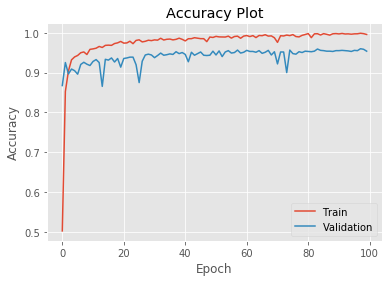

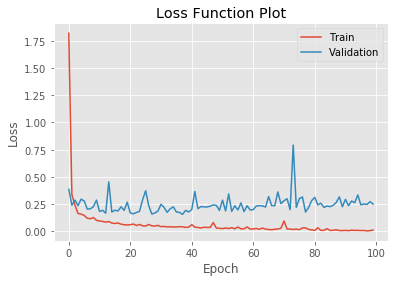

In [50]:
plt.plot(bst_lr_model_history.history['acc'])
plt.plot(bst_lr_model_history.history['val_acc'])
plt.title('Accuracy Plot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show() 
plt.plot(bst_lr_model_history.history['loss'])
plt.plot(bst_lr_model_history.history['val_loss'])
plt.title('Loss Function Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()